In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from my_functions_for_ml import *

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
import pandas as pd
import glob

# List all CSV files in the folder (adjust the path as needed)
# files = glob.glob("MachineLearningCVE/*.csv")

# List of CSVs to combine (customize as needed)
files = [
    "MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",
    "MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
    "MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv"
]

# Read and concatenate
df_list = [pd.read_csv(f) for f in files]
combined_df = pd.concat(df_list, ignore_index=True)  # preserves columns and stacks rows :contentReference[oaicite:2]{index=2}

print("Combined shape:", combined_df.shape)

Combined shape: (1663883, 79)


In [4]:
# Combine
# df = pd.concat([ddos, benign])
df = combined_df[:]

In [5]:
# Clean the column name first
df.columns = df.columns.str.strip()

In [6]:
print("Combine",df["Label"].value_counts())

Combine Label
BENIGN                        1122038
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
DoS slowloris                    5796
DoS Slowhttptest                 5499
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [7]:
df.sample(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1115702,80,34661922,7,6,364,11595,364,0,52.000000,137.579068,7240,0,1932.500000,2845.835677,3.450184e+02,0.375051,2.888494e+06,9.958285e+06,34500000,2,34500000,5.753837e+06,1.410000e+07,34500000,2,150814,3.016280e+04,6.070837e+04,138373,64,0,0,0,0,232,200,0.201951,0.173101,0,7240,854.214286,2015.672981,4.062938e+06,0,0,0,0,1,0,0,0,0,919.923077,52.000000,1932.500000,232,0,0,0,0,0,0,7,364,6,11595,274,235,1,32,984.0,0.000000,984,984,34500000.0,0.00000,34500000,34500000,DoS Hulk
1297221,80,993,6,0,6,0,6,0,1.000000,2.449490,0,0,0.000000,0.000000,6.042296e+03,6042.296073,1.986000e+02,4.396144e+02,985,1,993,1.986000e+02,4.396144e+02,985,1,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,180,0,6042.296073,0.000000,0,6,0.857143,2.267787,5.142857e+00,0,0,0,0,1,0,0,0,0,1.000000,1.000000,0.000000,180,0,0,0,0,0,0,6,6,0,0,251,-1,1,20,0.0,0.000000,0,0,0.0,0.00000,0,0,DoS Hulk
1656378,53,183,2,2,70,178,35,35,35.000000,0.000000,89,89,89.000000,0.000000,1.355191e+06,21857.923500,6.100000e+01,6.483826e+01,131,3,49,4.900000e+01,0.000000e+00,49,49,3,3.000000e+00,0.000000e+00,3,3,0,0,0,0,64,64,10928.961750,10928.961750,35,89,56.600000,29.577018,8.748000e+02,0,0,0,0,0,0,0,0,1,70.750000,35.000000,89.000000,64,0,0,0,0,0,0,2,70,2,178,-1,-1,1,32,0.0,0.000000,0,0,0.0,0.00000,0,0,BENIGN
1208212,80,85487712,8,6,692,11595,346,0,86.500000,160.166877,5792,0,1932.500000,2181.008184,1.437283e+02,0.163766,6.575978e+06,2.360000e+07,85300000,1,85500000,1.220000e+07,3.220000e+07,85300000,1,230049,4.600980e+04,1.025971e+05,229541,46,0,0,0,0,264,200,0.093581,0.070186,0,5792,819.133333,1611.699674,2.597576e+06,0,0,0,0,1,0,0,0,0,877.642857,86.500000,1932.500000,264,0,0,0,0,0,0,8,692,6,11595,274,235,2,32,5.0,0.000000,5,5,85300000.0,0.00000,85300000,85300000,DoS Hulk
1014172,80,46034244,9,9,509,2191,467,0,56.555556,153.929457,1460,0,243.444444,510.080168,5.865199e+01,0.391013,2.707897e+06,4.451622e+06,10200000,1,40800000,5.099196e+06,5.442422e+06,10200000,1,46000000,5.752365e+06,5.046194e+06,10200000,3,0,0,0,0,200,192,0.195507,0.195507,0,1460,142.105263,368.894579,1.360832e+05,0,0,0,1,0,0,0,0,1,150.000000,56.555556,243.444444,200,0,0,0,0,0,0,9,509,9,2191,29200,30,8,20,20055.5,9701.121671,34607,15146,10200000.0,92918.84877,10200000,10000000,BENIGN
172370,80,158303,3,7,26,11601,20,0,8.666667,10.263203,2920,0,1657.285714,1299.172136,7.344776e+04,63.169997,1.758922e+04,4.269565e+04,128776,16,29025,1.451250e+04,1.915482e+04,28057,968,158237,2.637283e+04,5.148179e+04,128776,16,0,0,0,0,72,152,18.950999,44.218998,0,2920,1057.000000,1306.290856,1.706396e+06,0,0,0,1,0,0,0,0,2,1162.700000,8.666667,1657.285714,72,0,0,0,0,0,0,3,26,7,11601,8192,229,2,20,0.0,0.000000,0,0,0.0,0.00000,0,0,DDoS
1296665,80,74,2,0

In [8]:
# Get total number of rows
total = len(df)

# Get label counts and percentages
label_counts = df["Label"].value_counts()
label_percentages = (label_counts / total) * 100

# Display counts and percentages
print("Label Counts:\n", label_counts)
print("\nLabel Percentages (%):\n", label_percentages.round(2))

Label Counts:
 Label
BENIGN                        1122038
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
DoS slowloris                    5796
DoS Slowhttptest                 5499
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

Label Percentages (%):
 Label
BENIGN                        67.43
DoS Hulk                      13.89
PortScan                       9.55
DDoS                           7.69
DoS GoldenEye                  0.62
DoS slowloris                  0.35
DoS Slowhttptest               0.33
Web Attack � Brute Force       0.09
Web Attack � XSS               0.04
Infiltration                   0.00
Web Attack � Sql Injection     0.00
Heartbleed                     0.00
Name: count, dtype: float64


In [9]:
columns = df.columns
columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663883 entries, 0 to 1663882
Data columns (total 79 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Destination Port             1663883 non-null  int64  
 1   Flow Duration                1663883 non-null  int64  
 2   Total Fwd Packets            1663883 non-null  int64  
 3   Total Backward Packets       1663883 non-null  int64  
 4   Total Length of Fwd Packets  1663883 non-null  int64  
 5   Total Length of Bwd Packets  1663883 non-null  int64  
 6   Fwd Packet Length Max        1663883 non-null  int64  
 7   Fwd Packet Length Min        1663883 non-null  int64  
 8   Fwd Packet Length Mean       1663883 non-null  float64
 9   Fwd Packet Length Std        1663883 non-null  float64
 10  Bwd Packet Length Max        1663883 non-null  int64  
 11  Bwd Packet Length Min        1663883 non-null  int64  
 12  Bwd Packet Length Mean       1663883 non-n

In [11]:
#missing values
missing_percentage(df)

Flow Bytes/s  :  1065  : [ 72.94520547945206 %]


In [12]:
# Replace common missing values
missing_values = [-1, 'NaN', 'nan', '', ' ']
df.replace(missing_values, np.nan, inplace=True)
# Drop rows with missing or infinite values
df.replace([np.inf, -np.inf], 0, inplace=True)
df.replace(-1, 0, inplace=True)
# Replace -1 with NaN in these
df[['Init_Win_bytes_forward', 'Init_Win_bytes_backward']] = df[['Init_Win_bytes_forward', 'Init_Win_bytes_backward']].replace(-1, np.nan)
df.dropna(inplace=True)

In [13]:
def cat_value_count(df_new):
    import pandas as pd
    categorical_cols = df_new.columns  # Select categorical columns
    for col in categorical_cols:
        print(f"Value counts for column: {col}\n")
        print(df_new[col].value_counts(), "\n" + "-"*40 + "\n")  # Display counts for each unique value
    categorical_cols = df.columns  # Select categorical columns
    return categorical_cols

In [14]:
cat_value_count(df)

Value counts for column: Destination Port

Destination Port
80       355026
443      185481
22         5730
21         2806
389        1960
          ...  
19066         1
19078         1
19063         1
19060         1
49032         1
Name: count, Length: 43678, dtype: int64 
----------------------------------------

Value counts for column: Flow Duration

Flow Duration
43.0           13568
44.0           12691
49.0           10988
48.0            8199
42.0            6622
               ...  
115760508.0        1
5168547.0          1
63785.0            1
104889.0           1
11512230.0         1
Name: count, Length: 554053, dtype: int64 
----------------------------------------

Value counts for column: Total Fwd Packets

Total Fwd Packets
1       288898
3       114643
8        65024
2        62256
7        60890
         ...  
5250         1
1387         1
710          1
821          1
1402         1
Name: count, Length: 880, dtype: int64 
----------------------------------------

V

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [15]:
#Remove columns contain same/0 value for all rows
columns_to_drop = [
    'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
    'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
    'CWE Flag Count', 'Bwd URG Flags', 'Fwd URG Flags', 'Bwd PSH Flags',
    'Fwd Header Length.1'
]

In [16]:
df.drop(columns=columns_to_drop, inplace=True)

In [17]:
# Reset index
df.reset_index(drop=True, inplace=True)

In [18]:
df.shape

(894827, 68)

In [19]:
# Get total number of rows
total = len(df)

# Get label counts and percentages
label_counts = df["Label"].value_counts()
label_percentages = (label_counts / total) * 100

# Display counts and percentages
print("Label Counts:\n", label_counts)
print("\nLabel Percentages (%):\n", label_percentages.round(5))

Label Counts:
 Label
BENIGN                        474220
DoS Hulk                      163867
PortScan                      158866
DDoS                           81481
DoS GoldenEye                   7710
DoS slowloris                   4154
DoS Slowhttptest                2327
Web Attack � Brute Force        1507
Web Attack � XSS                 635
Infiltration                      32
Web Attack � Sql Injection        21
Heartbleed                         7
Name: count, dtype: int64

Label Percentages (%):
 Label
BENIGN                        52.99572
DoS Hulk                      18.31270
PortScan                      17.75382
DDoS                           9.10578
DoS GoldenEye                  0.86162
DoS slowloris                  0.46422
DoS Slowhttptest               0.26005
Web Attack � Brute Force       0.16841
Web Attack � XSS               0.07096
Infiltration                   0.00358
Web Attack � Sql Injection     0.00235
Heartbleed                     0.00078
Name: coun

In [20]:
# Define mapping
group_map = {
    "DoS Hulk": "DoS/DDoS",
    "DDoS": "DoS/DDoS",
    "DoS GoldenEye": "DoS/DDoS",
    "DoS slowloris": "DoS/DDoS",
    "DoS Slowhttptest": "DoS/DDoS",
    "PortScan": "PortScan",
    "Web Attack – Brute Force": "Web Attack",
    "Web Attack � Brute Force": "Web Attack",
    "Web Attack – XSS": "Web Attack",
    "Web Attack � XSS": "Web Attack",
    "Web Attack – Sql Injection": "Web Attack",
    "Web Attack � Sql Injection": "Web Attack",
    "FTP-Patator": "Brute Force",
    "SSH-Patator": "Brute Force",
    "Bot": "Botnet",
    "Infiltration": "Other",
    "Heartbleed": "Other",
    # "Infiltration": "Infiltration",
    "BENIGN": "BENIGN"
}

df["Label_grouped"] = df["Label"].map(group_map)
print(df["Label_grouped"].value_counts())

Label_grouped
BENIGN        474220
DoS/DDoS      259539
PortScan      158866
Web Attack      2163
Other             39
Name: count, dtype: int64


In [21]:
df.drop(columns="Label", inplace=True)
df.reset_index(drop=True, inplace=True)

In [22]:
# Then drop missing
df = df.dropna(subset=['Label_grouped'])

In [23]:
df.sample(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_grouped
262340,5033,88.0,1,1,0,6,0,0,0.000000,0.000000,6,6,6.000000,0.000000,68181.818180,22727.272730,8.800000e+01,0.000000e+00,88.0,88.0,0,0.000000e+00,0.000000e+00,0,0.0,0,0.00,0.00000,0,0,0,40,20,11363.636360,11363.636360,0,6,2.000000,3.464102,1.200000e+01,0,0,0,1,0,0,0,1,3.000000,0.000000,6.000000,1,0,1,6,29200.0,0.0,0,40.0,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
579210,80,99534057.0,6,6,371,11595,371,0,61.833333,151.460116,4344,0,1932.500000,1754.831473,120.220157,0.120562,9.048551e+06,3.000000e+07,99400000.0,1.0,99400000,1.990000e+07,4.440000e+07,99400000,1.0,148841,29768.20,60391.07608,137460,16,0,200,200,0.060281,0.060281,0,4344,920.461538,1497.995973,2.243992e+06,0,0,0,0,1,0,0,1,997.166667,61.833333,1932.500000,6,371,6,11595,274.0,235.0,1,32.0,5.0,0.0,5,5,99400000.0,0.0,99400000,99400000,DoS/DDoS
755601,443,294861.0,10,9,557,4174,200,0,55.700000,72.582597,1430,0,463.777778,616.167749,16044.848250,64.437142,1.638117e+04,2.276790e+04,60835.0,3.0,294861,3.276233e+04,3.093897e+04,84033,3.0,198710,24838.75,39729.96483,110238,3,0,212,192,33.914285,30.522857,0,1430,236.550000,454.939611,2.069700e+05,0,0,0,1,0,0,0,0,249.000000,55.700000,463.777778,10,557,9,4174,8192.0,176.0,9,20.0,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
419679,5825,80.0,2,2,4,12,2,2,2.000000,0.000000,6,6,6.000000,0.000000,200000.000000,50000.000000,2.666667e+01,4.099187e+01,74.0,3.0,3,3.000000e+00,0.000000e+00,3,3.0,3,3.00,0.00000,3,3,0,48,40,25000.000000,25000.000000,2,6,3.600000,2.190890,4.800000e+00,0,0,0,1,0,0,0,1,4.500000,2.000000,6.000000,2,4,2,12,1024.0,0.0,1,24.0,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
803331,53766,70931.0,2,1,280,6,274,6,140.000000,189.504617,6,6,6.000000,0.000000,4032.087522,42.294624,3.546550e+04,5.005962e+04,70863.0,68.0,70931,7.093100e+04,0.000000e+00,70931,70931.0,0,0.00,0.00000,0,0,1,40,20,28.196416,14.098208,6,274,140.000000,154.729872,2.394133e+04,0,1,0,0,1,0,0,0,186.666667,140.000000,6.000000,2,280,1,6,60.0,0.0,1,20.0,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
45915,80,80319851.0,8,5,56,11607,20,0,7.000000,5.656854,10135,0,2321.400000,4413.201989,145.206943,0.161853,6.693321e+06,2.310000e+07,80000000.0,1.0,80100000,1.140000e+07,3.020000e+07,80000000,1.0,255565,63891.25,125510.86950,252151,89,0,172,112,0.099602,0.062251,0,10135,833.500000,2705.044255,7.317264e+06,0,0,0,0,1,0,0,0,897.615385,7.000000,2321.400000,8,56,5,11607,256.0,229.0,6,20.0,95908.0,0.0,95908,95908,80000000.0,0.0,80000000,80000000,DoS/DDoS
571569,443,3245597.0,5,1,123,46,46,0,24.600000,23.276598,46,46,46.000000,0.000000,52.070544,1.848658,6.491194e+05,1.423666e+06,3195713.0,3.0,3245597,8.113992e+05,1.589613e+06,3195713,3.0,0,0.00,0.00000,0,0,1,160,32,1.540549,0.308110,0,46,30.714286,21.684974,4.702381e+02,0,1,0,0,1,0,0,0,35.833333,24.600000,46.000000,5,123,1,46,1032.0,400.0,2,32.0,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
210266,1501,34.0,1,1,2,6,2,2,2.000000,0.000000,6,6,6.000000,0.000000,235294.117600,58823

In [24]:
df.shape

(894827, 68)

In [25]:
# label_enc = {"BENIGN":0, "DoS/DDoS":1, "PortScan":2, "Infiltration":3}
# combined_df["y"] = combined_df["Label_grouped"].map(label_enc)
from sklearn.preprocessing import LabelEncoder

# Separate X and y
X = df.drop(columns=['Label_grouped'])
y = df['Label_grouped']

# Encode label if not already
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Check mapping (e.g., {'BENIGN': 0, 'DDoS': 1})
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'BENIGN': 0, 'DoS/DDoS': 1, 'Other': 2, 'PortScan': 3, 'Web Attack': 4}


In [26]:
cols_to_drop = [
    'ECE Flag Count',          # Extremely rare
    'URG Flag Count',          # Rare in most samples
    'Bwd Packet Length Min',   # Highly skewed & redundant
    'Bwd Packet Length Max',   # High correlation with other packet lengths
    'Bwd Packets/s',           # Consider if correlated with Flow Packets/s
    'Subflow Bwd Packets',     # Possibly redundant
    'Subflow Bwd Bytes',       # Ditto
    # Add any columns with >99.9% zeros or duplicates
]

X_reduced = X.drop(columns=cols_to_drop)
X_reduced.reset_index(drop=True, inplace=True)
print("New shape:", X_reduced.shape)

New shape: (894827, 60)


In [27]:
#plot multiple plot in one functions
def All_plot(X):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy import stats
    col = X.columns
    for column in col:
        if np.issubdtype(X[column].dtype, np.number):  # Check if the column is numeric
            # fig, axes = plt.subplots(1, 3, figsize=(21, 6))  # 3 plots in a row

            skewness = X[column].skew()

            # Determine skewness type
            if skewness > 0:
                skew_type = "Positive Skewness"
            elif skewness < 0:
                skew_type = "Negative Skewness"
            else:
                skew_type = "Approximately Symmetrical"

            print(f"{column}: Skewness = {skewness:.2f} ({skew_type})")

            # # KDE plot
            # sns.kdeplot(X[column].dropna(), fill=True, color='blue', alpha=0.5, ax=axes[0])
            # axes[0].set_title(f"KDE Plot for {column}\n(Skewness: {skewness:.2f}) ({skew_type})", fontsize=12)
            # axes[0].set_xlabel(column)
            # axes[0].set_ylabel('Density')
            # axes[0].grid(alpha=0.3)

            # # Q-Q plot
            # stats.probplot(X[column].dropna(), dist="norm", plot=axes[1])
            # axes[1].set_title(f"Q-Q Plot for {column}", fontsize=12)

            # # Boxplot
            # sns.boxplot(x=X[column], ax=axes[2])
            # axes[2].set_title(f"Boxplot for {column}", fontsize=12)
            # axes[2].set_xlabel(column)

            # plt.tight_layout()
            # plt.show()


In [28]:
All_plot(X_reduced)

Destination Port: Skewness = 1.82 (Positive Skewness)
Flow Duration: Skewness = 0.95 (Positive Skewness)
Total Fwd Packets: Skewness = 259.45 (Positive Skewness)
Total Backward Packets: Skewness = 261.60 (Positive Skewness)
Total Length of Fwd Packets: Skewness = 619.05 (Positive Skewness)
Total Length of Bwd Packets: Skewness = 259.12 (Positive Skewness)
Fwd Packet Length Max: Skewness = 6.36 (Positive Skewness)
Fwd Packet Length Min: Skewness = 15.72 (Positive Skewness)
Fwd Packet Length Mean: Skewness = 5.66 (Positive Skewness)
Fwd Packet Length Std: Skewness = 6.90 (Positive Skewness)
Bwd Packet Length Mean: Skewness = 0.97 (Positive Skewness)
Bwd Packet Length Std: Skewness = 1.62 (Positive Skewness)
Flow Bytes/s: Skewness = 113.27 (Positive Skewness)
Flow Packets/s: Skewness = 14.15 (Positive Skewness)
Flow IAT Mean: Skewness = 3.50 (Positive Skewness)
Flow IAT Std: Skewness = 1.61 (Positive Skewness)
Flow IAT Max: Skewness = 1.39 (Positive Skewness)
Flow IAT Min: Skewness = 165.

In [29]:
columns_to_transform = [
    'Destination Port', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
    'Fwd Packet Length Max', 'Fwd Packet Length Min',
    'Fwd Packet Length Mean', 'Fwd Packet Length Std',
    'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
    'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
    'Flow IAT Min', 'Fwd IAT Mean', 'Fwd IAT Std',
    'Fwd IAT Min', 'Bwd IAT Mean', 'Bwd IAT Std',
    'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
    'Fwd Header Length', 'Bwd Header Length',
    'Fwd Packets/s', 'Min Packet Length', 'Packet Length Variance',
    'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count',
    'URG Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
    'Avg Fwd Segment Size', 'Subflow Fwd Packets',
    'Subflow Fwd Bytes', 'Init_Win_bytes_forward',
    'Init_Win_bytes_backward', 'act_data_pkt_fwd',
    'Active Mean', 'Active Std', 'Active Max', 'Active Min',
    'Idle Std'
]


In [30]:
chunk_size = 50000
n = X_reduced.shape[0]

transformed_chunks = []
lambdas_list = []

for start in range(0, n, chunk_size):
    end = min(start + chunk_size, n)
    X_chunk = X_reduced.iloc[start:end].copy()
    # Note: ensure X_chunk does *not* include target columns like 'y'
    
    transformed_X_chunk, lambdas = Advance_column_transformer(
        X_chunk,
        columns=columns_to_transform,
        method='yeo-johnson',
        standardize=True
    )
    
    transformed_chunks.append(transformed_X_chunk)
    lambdas_list.append(lambdas)

# Reconstruct the full transformed DataFrame:
transformed_X = pd.concat(transformed_chunks, ignore_index=True)

# For simplicity, assume each chunk uses same lambdas:
lambdas_X = lambdas_list[0]


In [31]:
All_plot(transformed_X)

Destination Port: Skewness = -0.35 (Negative Skewness)
Total Fwd Packets: Skewness = 0.24 (Positive Skewness)
Total Backward Packets: Skewness = 0.26 (Positive Skewness)
Total Length of Fwd Packets: Skewness = 0.65 (Positive Skewness)
Total Length of Bwd Packets: Skewness = 0.31 (Positive Skewness)
Fwd Packet Length Max: Skewness = 0.68 (Positive Skewness)
Fwd Packet Length Min: Skewness = 2.45 (Positive Skewness)
Fwd Packet Length Mean: Skewness = 0.56 (Positive Skewness)
Fwd Packet Length Std: Skewness = 1.52 (Positive Skewness)
Bwd Packet Length Std: Skewness = 1.41 (Positive Skewness)
Flow Bytes/s: Skewness = 4.12 (Positive Skewness)
Flow Packets/s: Skewness = -2.68 (Negative Skewness)
Flow IAT Mean: Skewness = -1.05 (Negative Skewness)
Flow IAT Std: Skewness = 0.58 (Positive Skewness)
Flow IAT Max: Skewness = -1.15 (Negative Skewness)
Flow IAT Min: Skewness = -7.73 (Negative Skewness)
Fwd IAT Mean: Skewness = 0.75 (Positive Skewness)
Fwd IAT Std: Skewness = 0.80 (Positive Skewness

In [33]:
import numpy as np
import pandas as pd

def cap_outliers_iqr_chunkwise(df, chunk_size=50000, inplace=False):
    """
    Applies IQR-based outlier capping in chunks to reduce memory usage.
    Returns a new capped DataFrame by default.
    """
    df_out = [] if not inplace else None

    n = df.shape[0]
    for start in range(0, n, chunk_size):
        end = min(start + chunk_size, n)
        chunk = df.iloc[start:end].copy()

        # Apply capping per-column
        for col in chunk.select_dtypes(include=[np.number]).columns:
            Q1 = chunk[col].quantile(0.25)
            Q3 = chunk[col].quantile(0.75)
            IQR = Q3 - Q1

            if IQR == 0 or pd.isna(IQR):
                continue  # skip constant or empty columns

            low, high = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
            chunk[col] = chunk[col].clip(lower=low, upper=high)

        if inplace:
            df.iloc[start:end] = chunk.values
        else:
            df_out.append(chunk)

    if not inplace:
        return pd.concat(df_out, ignore_index=True)

X_fin_capped = cap_outliers_iqr_chunkwise(transformed_X, chunk_size=50000, inplace=False)

In [34]:
X_fin_capped

,Destination Port,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Min,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Min Packet Length,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,Down/Up Ratio,Avg Fwd Segment Size,Subflow Fwd Packets,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,Active Mean,Active Std,Active Max,Active Min,Idle Std,Flow Duration,Bwd Packet Length Mean,Fwd IAT Total,Fwd IAT Max,Bwd IAT Total,Max Packet Length,Packet Length Mean,Packet Length Std,PSH Flag Count,ACK Flag Count,Average Packet Size,Avg Bwd Segment Size,min_seg_size_forward,Idle Mean,Idle Max,Idle Min
0,1.715961,-1.700948,-1.396459,-0.876047,-1.646733,-0.995149,2.354069,-0.508041,-0.717889,-1.579451,1.138446,1.979731,-1.999286,-2.159900,-2.138832,1.542492,-1.586160,-1.527906,-1.377677,-2.109744,-2.069150,-2.135007,-1.647091,-0.214942,-1.645383,-1.159828,1.971100,2.604712,-1.859280,-0.049457,-0.214942,-0.010001,0.040886,-0.508041,-1.700948,-0.876047,-1.815088,0.244985,-1.411082,-0.736257,-0.223261,-0.735925,-0.736497,-0.448304,109.00,6.0,0.0,0.0,0.0,6.0,6.0,0.000000,0.0,1.0,9.0,6.0,20.0,0.0,0.0,0.0
1,1.715962,-1.700948,-1.396459,-0.876047,-1.646733,-0.995149,2.354069,-0.508041,-0.717889,-1.579451,1.379810,2.030971,-2.111008,-2.159900,-2.229678,1.290650,-1.586160,-1.527906,-1.377677,-2.109744,-2.069150,-2.135007,-1.647091,-0.214942,-1.645383,-1.159828,1.998491,2.604712,-1.859280,-0.049457,-0.214942,-0.010001,0.040886,-0.508041,-1.700948,-0.876047,-1.815088,0.244985,-1.411082,-0.736257,-0.223261,-0.735925,-0.736497,-0.448304,52.00,6.0,0.0,0.0,0.0,6.0,6.0,0.000000,0.0,1.0,9.0,6.0,20.0,0.0,0.0,0.0
2,1.707852,-1.700948,-1.396459,-0.876047,-1.646733,-0.995149,2.354069,-0.508041,-0.717889,-1.579451,1.521147,2.056279,-2.170552,-2.159900,-2.278444,1.116255,-1.586160,-1.527906,-1.377677,-2.109744,-2.069150,-2.135007,-1.647091,-0.214942,-1.645383,-1.159828,2.011151,2.604712,-1.859280,-0.049457,-0.214942,-0.010001,0.040886,-0.508041,-1.700948,-0.876047,-1.798849,0.389519,-1.411082,-0.736257,-0.223261,-0.735925,-0.736497,-0.448304,34.00,6.0,0.0,0.0,0.0,6.0,6.0,0.000000,0.0,1.0,9.0,6.0,20.0,0.0,0.0,0.0
3,1.715857,-1.700948,-1.396459,-0.876047,-1.646733,-0.995149,2.354069,-0.508041,-0.717889,-1.579451,1.450600,2.044037,-2.141357,-2.159900,-2.254502,1.205923,-1.586160,-1.527906,-1.377677,-2.109744,-2.069150,-2.135007,-1.647091,-0.214942,-1.645383,-1.159828,2.005102,2.604712,-1.859280,-0.049457,-0.214942,-0.010001,0.040886,-0.508041,-1.700948,-0.876047,-1.791037,0.244985,-1.411082,-0.736257,-0.223261,-0.735925,-0.736497,-0.448304,42.00,6.0,0.0,0.0,0.0,6.0,6.0,0.000000,0.0,1.0,9.0,6.0,20.0,0.0,0.0,0.0
4,1.695203,-1.700948,-1.396459,-0.876047,-1.790788,-3.035399,-0.424093,-0.643254,-0.717889,-1.579451,-1.949596,2.028587,-2.105557,-2.159900,-2.225227,1.305027,-1.586160,-1.527906,-1.377677,-2.109744,-2.069150,-2.135007,-1.647091,-0.214942,-1.198076,-1.159828,1.997268,-0.383920,-1.859280,-0.049457,-0.214942,-0.010001,0.040886,-0.643254,-1.700948,-0.876047,-0.606576,1.238775,-1.411082,-0.736257,-0.223261,-0.735925,-0.736497,-0.448304,54.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,32.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894822,-1.158514,1.408059,-0.558659,0.692604,0.267583,0.279503,1.287207,0.382404,-0.555451,-0.462529,0.948346,0.166170,-0.282824,1.020741,0.002836,-1.337177,0.074973,0.157958,0.440302,-0.541724,-0.482583,-0.541454,-0.540969,-0.165494,0.84760

In [35]:
X_fin_capped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894827 entries, 0 to 894826
Data columns (total 60 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             894827 non-null  float64
 1   Total Fwd Packets            894827 non-null  float64
 2   Total Backward Packets       894827 non-null  float64
 3   Total Length of Fwd Packets  894827 non-null  float64
 4   Total Length of Bwd Packets  894827 non-null  float64
 5   Fwd Packet Length Max        894827 non-null  float64
 6   Fwd Packet Length Min        894827 non-null  float64
 7   Fwd Packet Length Mean       894827 non-null  float64
 8   Fwd Packet Length Std        894827 non-null  float64
 9   Bwd Packet Length Std        894827 non-null  float64
 10  Flow Bytes/s                 894827 non-null  float64
 11  Flow Packets/s               894827 non-null  float64
 12  Flow IAT Mean                894827 non-null  float64
 13 

In [37]:
X_fin_capped.shape

(894827, 60)

In [46]:
import numpy as np

n_cols = X_fin_capped.shape[1]
n_views = 10
cols_per_view = n_cols // n_views  # integer division

views = []
for i in range(n_views):
    start = i * cols_per_view
    end = (i + 1) * cols_per_view if i < n_views - 1 else n_cols
    Xv = X_fin_capped.iloc[:, start:end]
    views.append(Xv.values)
    print(f"View {i+1}: cols {start}:{end} → shape {Xv.shape} ")
    


View 1: cols 0:6 → shape (894827, 6) 
View 2: cols 6:12 → shape (894827, 6) 
View 3: cols 12:18 → shape (894827, 6) 
View 4: cols 18:24 → shape (894827, 6) 
View 5: cols 24:30 → shape (894827, 6) 
View 6: cols 30:36 → shape (894827, 6) 
View 7: cols 36:42 → shape (894827, 6) 
View 8: cols 42:48 → shape (894827, 6) 
View 9: cols 48:54 → shape (894827, 6) 
View 10: cols 54:60 → shape (894827, 6) 


In [43]:
from mvlearn.embed import MCCA
mvcca = MCCA(n_components=2, regs=1e-3)  # You can try 1e-4 or 1e-2 as well
views_transformed = mvcca.fit_transform(views)

In [47]:
# Print transformed shapes
for i, view in enumerate(views_transformed, 1):
    print(f"View {i} shape after MCCA: {view.shape}")

View 1 shape after MCCA: (894827, 2)
View 2 shape after MCCA: (894827, 2)
View 3 shape after MCCA: (894827, 2)
View 4 shape after MCCA: (894827, 2)
View 5 shape after MCCA: (894827, 2)
View 6 shape after MCCA: (894827, 2)
View 7 shape after MCCA: (894827, 2)
View 8 shape after MCCA: (894827, 2)
View 9 shape after MCCA: (894827, 2)
View 10 shape after MCCA: (894827, 2)


In [48]:
X_mcca = np.concatenate(views_transformed, axis=1)

In [57]:
# pip install imblearn

In [54]:
from imblearn.over_sampling import SMOTE

# `y` is a 1D array of integer labels, not one-hot.
sm = SMOTE()
X_res, y_res = sm.fit_resample(X_mcca, y_encoded)  # ❌ y must be 1D ints

# Now one-hot encode for the network
from tensorflow.keras.utils import to_categorical
Y_res_onehot = to_categorical(y_res, num_classes=5)

2025-07-14 17:30:52.499093: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-14 17:30:52.626359: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752514252.674256   19644 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752514252.687473   19644 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752514252.790269   19644 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [61]:
X_res.shape ,Y_res_onehot.shape

((2371100, 20), (2371100, 5))

In [62]:
from sklearn.model_selection import train_test_split
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res, Y_res_onehot, test_size=0.2, random_state=42)

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1896880, 20), (474220, 20), (1896880, 5), (474220, 5))

# Model-1 : CNN+LSTM

In [65]:
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Dense, Reshape, Conv1D, LSTM, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.utils import plot_model

# # Set number of classes
# num_classes = y_train.shape[1]

# # Define model
# inp = Input(shape=(X_train.shape[1],))  # (20,)
# x = Dense(128, activation='relu')(inp)
# x = Dense(64, activation='relu')(x)

# # Reshape to (batch_size, timesteps=1, features=64)
# x = Reshape((1, 64))(x)

# x = Conv1D(64, kernel_size=1, activation='relu')(x)
# x = Conv1D(32, kernel_size=1, activation='relu')(x)
# x = LSTM(32)(x)

# x = Dropout(0.3)(x)
# x = Dense(32, activation='relu')(x)
# out = Dense(num_classes, activation='softmax')(x)

# model = Model(inputs=inp, outputs=out)

# # Compile model
# model.compile(
#     optimizer='adam',
#     loss=tf.keras.losses.CategoricalFocalCrossentropy(from_logits=False),  # stable focal loss
#     metrics=['accuracy']
# )

# # Optional: Early stopping
# early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 1, 64)          │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 1, 32)          │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,725 (104.39 KB)

 Trainable params: 26,725 (104.39 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
# # Optional: Early stopping
# early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Fit the model
# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_test, y_test),
#     epochs=20,
#     batch_size=1024,
#     callbacks=[early_stop],
#     verbose=1
# )

Epoch 1/20


I0000 00:00:1752514663.504264   20450 cuda_dnn.cc:529] Loaded cuDNN version 90501


1853/1853 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.5205 - loss: 0.1588 - val_accuracy: 0.7295 - val_loss: 0.0848
Epoch 2/20
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.7617 - loss: 0.0742 - val_accuracy: 0.7845 - val_loss: 0.0704
Epoch 3/20
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.7962 - loss: 0.0637 - val_accuracy: 0.8135 - val_loss: 0.0572
Epoch 4/20
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8085 - loss: 0.0593 - val_accuracy: 0.8274 - val_loss: 0.0518
Epoch 5/20
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8112 - loss: 0.0577 - val_accuracy: 0.8119 - val_loss: 0.0566
Epoch 6/20
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8226 - loss: 0.0529 - val_accuracy: 0.8415 - val_loss: 0.0463
Epoch 7/20
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8199 - loss: 0.0544 - val_accuracy: 0.8496 - val_loss: 0.0411
Epoch 8/20
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8352 - loss: 0.04

In [72]:
from tensorflow.keras.layers import Bidirectional, Attention

inp = Input((X_train.shape[1],))
x = Dense(128, activation='relu')(inp)
x = Dense(64, activation='relu')(x)
x = Reshape((1,64))(x)
x = Conv1D(64,1,activation='relu')(x)
x = Conv1D(32,1,activation='relu')(x)
x = Bidirectional(LSTM(32, return_sequences=True))(x)

# Attention
att = Attention()([x, x])
x = LSTM(32)(att)

x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)
out = Dense(num_classes, activation='softmax')(x)

model = Model(inp, out)
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalFocalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 20)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 128)       │      2,688 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 64)        │      8,256 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_3 (Reshape) │ (None, 1, 64)     │          0 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 1, 64)     │      4,160 │ reshape_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 1, 32)     │      2,080 │ conv1d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 1, 64)     │     16,640 │ conv1d_7[0][0]    │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_1         │ (None, 1, 64)     │          0 │ bidirectional_1[… │
│ (Attention)         │                   │            │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ (None, 32)        │     12,416 │ attention_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32)        │          0 │ lstm_5[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 32)        │      1,056 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 5)         │        165 │ dense_13[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 47,461 (185.39 KB)

 Trainable params: 47,461 (185.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Optional: Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=1024,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20


/home/parvez/Notebook_GPU/jupyter_gpu/lib/python3.12/site-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1853/1853 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.4391 - loss: 0.1825 - val_accuracy: 0.7215 - val_loss: 0.0839
Epoch 2/20
 357/1853 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.6988 - loss: 0.0938

In [67]:
# 1️⃣ Evaluate on train and test sets
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=1)
print(f"\n✅ Train Accuracy: {train_accuracy:.4f}")
print(f"❌ Train Loss: {train_loss:.4f}")

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"\n✅ Test Accuracy: {test_accuracy:.4f}")
print(f"❌ Test Loss: {test_loss:.4f}")


59278/59278 ━━━━━━━━━━━━━━━━━━━━ 342s 6ms/step - accuracy: 0.9470 - loss: 0.0135

✅ Train Accuracy: 0.9472
❌ Train Loss: 0.0135
14820/14820 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - accuracy: 0.9473 - loss: 0.0134

✅ Test Accuracy: 0.9473
❌ Test Loss: 0.0135


/home/parvez/Notebook_GPU/jupyter_gpu/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


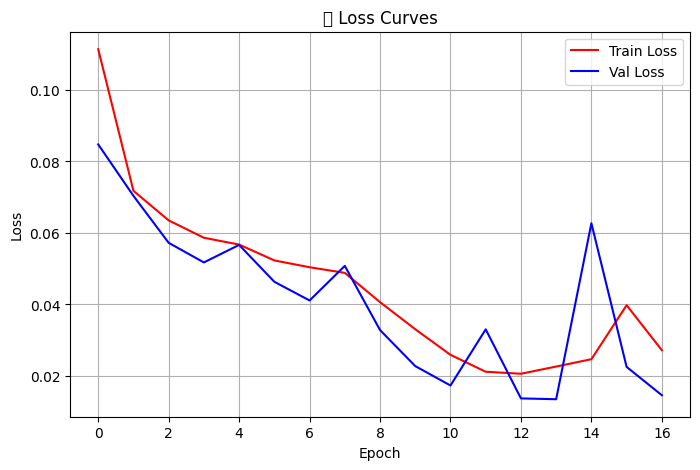

/home/parvez/Notebook_GPU/jupyter_gpu/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


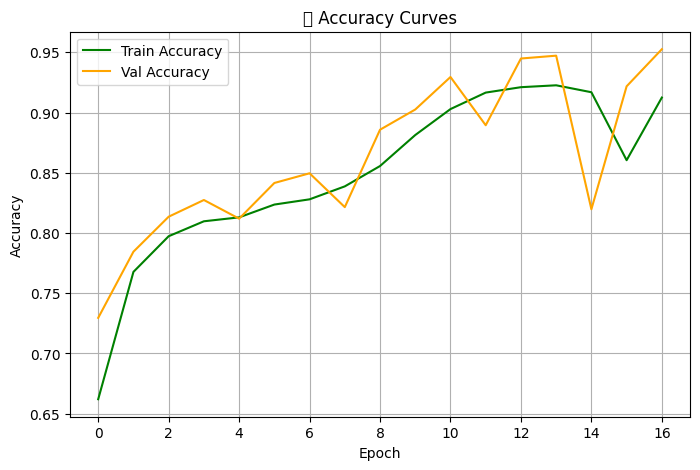

In [68]:
import matplotlib.pyplot as plt

# Plot Loss Curves
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Val Loss', color='blue')
plt.title('📉 Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy Curves
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='orange')
plt.title('📈 Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [69]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict(X_test, batch_size=1024)
y_true = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

print(classification_report(y_true, y_pred_labels, target_names=label_encoder.classes_))
print(confusion_matrix(y_true, y_pred_labels))


464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

      BENIGN       0.90      0.84      0.87     94784
    DoS/DDoS       0.92      0.93      0.93     94654
       Other       0.98      1.00      0.99     95245
    PortScan       0.97      0.99      0.98     95149
  Web Attack       0.96      0.98      0.97     94388

    accuracy                           0.95    474220
   macro avg       0.95      0.95      0.95    474220
weighted avg       0.95      0.95      0.95    474220

[[79353  6824  1569  3325  3713]
 [ 6243 88134    99    95    83]
 [  356     0 94865     0    24]
 [  557    27     0 94542    23]
 [ 1650   424     0     0 92314]]
